In [ ]:
# keras imports for the dataset and building our neural network
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPool2D, Flatten
from keras.utils import np_utils
import keras
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
file_list = drive.ListFile({'q': "'root' in parents and trashed=false"}).GetList()
for file1 in file_list:
  print('title: %s, id: %s' % (file1['title'], file1['id']))

dataset = drive.CreateFile({'id': '1BDMPjvS-5yBi7XZve2maVnFMsQWuoa-7'})
dataset.GetContentFile('dataset')

data=pd.read_csv('dataset')

data = data.drop(['Flow ID'], axis=1)
data = data.drop(['Unnamed: 0'], axis=1)
data = data.drop(['Timestamp'], axis=1)

nonImportantColumns = [
'Source IP',
'Destination IP',
'Protocol',
'Flow Duration',
'Total Fwd Packets',
'Total Backward Packets',
'Fwd Packet Length Std',
'Bwd Packet Length Std',
'Flow Bytes/s',
'Flow Packets/s',
'Flow IAT Max',
'Fwd IAT Total',
'Fwd IAT Max',
'Bwd IAT Total',
'Bwd IAT Std',
'Bwd IAT Max',
'Bwd IAT Min',
'Fwd PSH Flags',
'Bwd PSH Flags',
'Fwd URG Flags',
'Bwd URG Flags',
'Fwd Header Length',
'Bwd Header Length',
'Fwd Packets/s',
'Packet Length Std',
'FIN Flag Count',
'SYN Flag Count',
'RST Flag Count',
'PSH Flag Count',
'ACK Flag Count',
'URG Flag Count',
'CWE Flag Count',
'ECE Flag Count',
'Down/Up Ratio',
'Fwd Header Length.1',
'Fwd Avg Bytes/Bulk',
'Fwd Avg Packets/Bulk',
'Fwd Avg Bulk Rate',
'Bwd Avg Bytes/Bulk',
'Bwd Avg Packets/Bulk',
'Bwd Avg Bulk Rate',
'Subflow Fwd Packets',
'Subflow Bwd Packets',
'act_data_pkt_fwd',
'min_seg_size_forward',
'Active Std',
'Active Max',
'Active Min',
'Idle Mean',
'Idle Std',
'Idle Max',
'Idle Min',
'SimillarHTTP',
'Inbound'
]
for column in nonImportantColumns :
 data = data.drop([column], axis=1)

#data['Source IP']=pd.get_dummies(data['Source IP'], prefix='Source IP')
#data['Destination IP']=pd.get_dummies(data['Destination IP'], prefix='Destination IP')
#data['Flow Bytes/s']=pd.get_dummies(data['Flow Bytes/s'], prefix='Flow Bytes/s')
#data['Flow Packets/s']=pd.get_dummies(data['Flow Packets/s'], prefix='Flow Packets/s')
#data['Timestamp']=pd.get_dummies(data['Timestamp'], prefix='Timestamp')
#data['SimillarHTTP']=pd.get_dummies(data['SimillarHTTP'], prefix='SimillarHTTP')


data['Label']=data['Label'].map( {'BENIGN':0, 'DrDoS_DNS':1, 'DrDoS_LDAP':1, 'DrDoS_MSSQL':1, 'DrDoS_NetBIOS':1, 'DrDoS_NTP':1, 'LDAP':1, 
                                            'DrDoS_SSDP':1, 'DrDoS_UDP':1, 'NetBIOS':1, 'Portmap':1, 'Syn':1, 'TFTP':1, 'UDP':1, 'UDPLag':1, 'UDP-lag':1, 'WebDDoS':1, 'MSSQL':1,   } )


data.columns = data.columns.str.replace(' ', '_')

data = data.replace([np.inf, -np.inf], np.nan)
data = data.dropna()
#def nans(df): return df[df.isnull().any(axis=1)]
#nans(data)

data.Label = pd.factorize(data.Label)[0]
y_eval = data.pop("Label")

x = data
#y = pd.get_dummies(y_eval)
y = y_eval

X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.2,
                                               random_state=2)

X_train.reset_index(drop=True,inplace=True)
Y_train.reset_index(drop=True,inplace=True)
X_test.reset_index(drop=True,inplace=True)
Y_test.reset_index(drop=True,inplace=True)

st=StandardScaler()

st.fit(X_train)




title: DDOS_2019_Sample_File.csv, id: 1g5Bt3iIEQ2ob-v3Us0dM3BUCYjqkhZFq
title: DDOS_Train - Copy.xlsx, id: 12AH-hKoMZgQDEvV1fxJq-j58kpA46MF0
title: DDOS_Train.xlsx, id: 17pgNoCZ7BtSYc1wIypBDSkiJNbIUSSdx
title: DDOS_Test.csv, id: 1sKD6QuBVyaEDjPb-mCDkPjwfAd8-YaDm
title: NSL_KDD_Train.csv, id: 1NdNFFeHHC7_wbGl67owDY340O-DzwAOn
title: DrDoS_NTP_Train.csv, id: 1UtZFETT1ldMj2FRvq6vkDWlzkxxnhJ5s
title: Portmap-train - 10.csv, id: 1nvW3yWfVj3Sm8KlT069w0TtbMvzDu9x2
title: Colab Notebooks, id: 1-gHxYdhAkhUseRaT3gzWT4MPxPDP8fmX
title: RM1 Submission, id: 1ulNMgBVt790mNJ3D5j79ppRmQ_i35rBV
title: Hash and sc, id: 1P-3Ta-F1e7MzcbtW0zGM1C0I-Z9eDh3G
title: Ecommerce Project SS, id: 1LLQZAzE4m59vlgzsy_Wkx37LPSAJVRYY
title: Manish Patel_New-CV.docx, id: 1I6uOjjOtvhwDWTbNiQf0y6Z2pA9dxcez
title: Patel, Manishkumar VOE 08-31-19.pdf, id: 0B_gPr3BosfdmYnN0bjdJVnhSbmJlVk5zMGdKa2k0S3NrbkhN
title: Getting started, id: 0B_gPr3Bosfdmc3RhcnRlcl9maWxlX2Rhc2hlclYw


/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (1,2,4,7,85,87) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


StandardScaler(copy=True, with_mean=True, with_std=True)

In [ ]:
# Get Feature columns
import tensorflow as tf
featureColumns = []
for col in X_train.columns: 
    featureColumns.append(col) 
print(featureColumns)
feature_columns = []
for feature_name in featureColumns:
    feature_columns.append(tf.feature_column.numeric_column(feature_name, dtype=tf.float32))


['Source_Port', 'Destination_Port', 'Total_Length_of_Fwd_Packets', 'Total_Length_of_Bwd_Packets', 'Fwd_Packet_Length_Max', 'Fwd_Packet_Length_Min', 'Fwd_Packet_Length_Mean', 'Bwd_Packet_Length_Max', 'Bwd_Packet_Length_Min', 'Bwd_Packet_Length_Mean', 'Flow_IAT_Mean', 'Flow_IAT_Std', 'Flow_IAT_Min', 'Fwd_IAT_Mean', 'Fwd_IAT_Std', 'Fwd_IAT_Min', 'Bwd_IAT_Mean', 'Bwd_Packets/s', 'Min_Packet_Length', 'Max_Packet_Length', 'Packet_Length_Mean', 'Packet_Length_Variance', 'Average_Packet_Size', 'Avg_Fwd_Segment_Size', 'Avg_Bwd_Segment_Size', 'Subflow_Fwd_Bytes', 'Subflow_Bwd_Bytes', 'Init_Win_bytes_forward', 'Init_Win_bytes_backward', 'Active_Mean']


In [ ]:
print(tf.feature_column.numeric_column)

<function numeric_column at 0x7f2f0eb5e598>


In [ ]:
def make_input_fn(data_df, label_df, num_epochs=1, shuffle=False, batch_size=32):
  def input_function():
    #The given tensors are sliced along their first dimension. This operation preserves the structure of the input tensors, 
    #removing the first dimension of each tensor and using it as the dataset dimension. 
    ds = tf.data.Dataset.from_tensor_slices((dict(data_df), label_df))
    if shuffle:
      ds = ds.shuffle(1000)
    ds = ds.batch(batch_size).repeat(num_epochs)
    print(ds)
    return ds
  return input_function

train_input_fn = make_input_fn(X_train, Y_train)
eval_input_fn = make_input_fn(X_test, Y_test)

# LA Start
#first layer has 32 nodes, second layer has 16 nodes and third layer has 8 nodes.
dnnClassifierModel = tf.estimator.DNNClassifier(hidden_units=[32, 16, 8], feature_columns=feature_columns, n_classes=2, activation_fn=tf.nn.elu)
dnnClassifierModel.train(train_input_fn)
result = dnnClassifierModel.evaluate(eval_input_fn)
# LA End

# HA Start
#inputFunction = tf.compat.v1.estimator.inputs.pandas_input_fn(x=X_train,y=Y_train,batch_size=100,num_epochs=1000,shuffle=True)
#dnnClassifierModel = tf.estimator.DNNClassifier(hidden_units=[512, 256, 128], feature_columns=feature_columns, n_classes=2, activation_fn=tf.nn.tanh)
# Also try with activation_fn=tf.nn.elu
# HA End

print(result)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmpbr2rqjiy', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
<RepeatDataset shapes: ({Source_Port: (None,), Destination_Port: (None,), Total_Length_of_Fwd_Packets: (None,), Total

In [ ]:
# Get predictions from testing data
predictions = dnnClassifierModel.predict(input_fn=eval_input_fn)
y_pred = []
for i in predictions:
    y_pred.append(i['classes'].astype(str).astype(int))

<RepeatDataset shapes: ({Source_Port: (None,), Destination_Port: (None,), Total_Length_of_Fwd_Packets: (None,), Total_Length_of_Bwd_Packets: (None,), Fwd_Packet_Length_Max: (None,), Fwd_Packet_Length_Min: (None,), Fwd_Packet_Length_Mean: (None,), Bwd_Packet_Length_Max: (None,), Bwd_Packet_Length_Min: (None,), Bwd_Packet_Length_Mean: (None,), Flow_IAT_Mean: (None,), Flow_IAT_Std: (None,), Flow_IAT_Min: (None,), Fwd_IAT_Mean: (None,), Fwd_IAT_Std: (None,), Fwd_IAT_Min: (None,), Bwd_IAT_Mean: (None,), Bwd_Packets/s: (None,), Min_Packet_Length: (None,), Max_Packet_Length: (None,), Packet_Length_Mean: (None,), Packet_Length_Variance: (None,), Average_Packet_Size: (None,), Avg_Fwd_Segment_Size: (None,), Avg_Bwd_Segment_Size: (None,), Subflow_Fwd_Bytes: (None,), Subflow_Bwd_Bytes: (None,), Init_Win_bytes_forward: (None,), Init_Win_bytes_backward: (None,), Active_Mean: (None,)}, (None,)), types: ({Source_Port: tf.float64, Destination_Port: tf.float64, Total_Length_of_Fwd_Packets: tf.float64, T

In [ ]:
y_pred_new = pd.DataFrame(y_pred)
print(y_pred_new)

       0
0      0
1      1
2      1
3      0
4      1
...   ..
28387  0
28388  1
28389  0
28390  1
28391  1

[28392 rows x 1 columns]


In [ ]:
print(Y_test)

0        0
1        1
2        1
3        0
4        1
        ..
28387    0
28388    1
28389    1
28390    1
28391    1
Name: Label, Length: 28392, dtype: int64


sensitivity: 0.877813, specificity: 0.859493


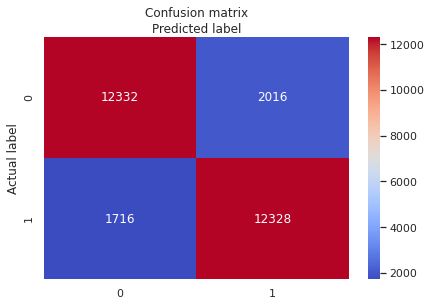

In [ ]:
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid')
cnf_matrix = metrics.confusion_matrix(Y_test,y_pred_new.round())
class_names=[0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="coolwarm" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

TP = cnf_matrix[1, 1]
TN = cnf_matrix[0, 0]
FP = cnf_matrix[0, 1]
FN = cnf_matrix[1, 0]
sensitivity = TP / float(FN + TP)

#When the actual value is positive, how often is the prediction correct?
#When the actual value is negative, how often is the prediction correct?
specificity = TN / (TN + FP)
print('sensitivity: %0f, specificity: %0f' % (sensitivity,specificity))

0.8686526006083712


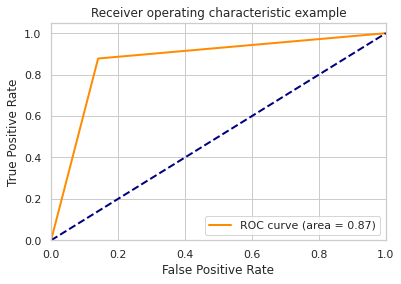

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
fpr_keras, tpr_keras, thresholds_keras = roc_curve(Y_test, y_pred_new.round())
auc_keras = auc(fpr_keras, tpr_keras)
print(auc_keras)

plt.figure()
lw = 2
plt.plot(fpr_keras, tpr_keras, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % auc_keras)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [ ]:
from sklearn.metrics import precision_recall_curve
precision, recall, thresholds = precision_recall_curve(Y_test, y_pred_new.round())
print('precision ', precision)
print('recall ', recall)
print('thresholds ', thresholds)

from sklearn.metrics import f1_score
f1 = f1_score(Y_test, y_pred_new.round())
print('f1_score',f1)

precision  [0.49464638 0.85945343 1.        ]
recall  [1.         0.87781259 0.        ]
thresholds  [0 1]
f1_score 0.868536001127237


**DO NOT GO BELOW**

In [ ]:
# building a linear stack of layers with the sequential model
model = Sequential()
# convolutional layer
model.add(keras.layers.Flatten(input_shape=(84, 1)))
#model.add(MaxPool2D(pool_size=(1,1)))
# flatten output of conv
model.add(Flatten())

# hidden layer
model.add(Dense(1, activation='relu'))

# output layer
model.add(Dense(1, activation='softmax'))

# compiling the sequential model
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')
print(X_train.shape)
print(Y_train.shape)
# training the model for 10 epochs
model.fit(X_train, Y_train, batch_size=1000, epochs=1000, validation_data=(X_test, Y_test))

(113566, 30)
(113566,)
Epoch 1/1000


ValueError: ignored

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(model.predict_classes, y_pred))
print('Classification Report')
target_names = ['Cats', 'Dogs', 'Horse']
print(classification_report(validation_generator.classes, y_pred, target_names=target_names))


In [ ]:
# to calculate accuracy
from sklearn.metrics import accuracy_score

# loading the dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# building the input vector from the 28x28 pixels
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# normalizing the data to help with the training
X_train /= 255
X_test /= 255

# one-hot encoding using keras' numpy-related utilities
n_classes = 10
print("Shape before one-hot encoding: ", y_train.shape)
Y_train = np_utils.to_categorical(y_train, n_classes)
Y_test = np_utils.to_categorical(y_test, n_classes)
print("Shape after one-hot encoding: ", Y_train.shape)

# building a linear stack of layers with the sequential model
model = Sequential()
# convolutional layer
model.add(Conv2D(25, kernel_size=(3,3), strides=(1,1), padding='valid', activation='relu', input_shape=(28,28,1)))
model.add(MaxPool2D(pool_size=(1,1)))
# flatten output of conv
model.add(Flatten())
# hidden layer
model.add(Dense(100, activation='relu'))
# output layer
model.add(Dense(10, activation='softmax'))

# compiling the sequential model
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

# training the model for 10 epochs
model.fit(X_train, Y_train, batch_size=128, epochs=10, validation_data=(X_test, Y_test))